In [1]:
from pprint import pprint as print

import pandas as pd
import matplotlib.pyplot as plt

from automoticz.app import create_app

app = create_app()

/home/noleksiuk/git-clones/automoticz-server/.venv/lib/python3.5/site-packages/dynaconf/loaders/base.py:95: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  'ENCODING_FOR_DYNACONF', 'utf-8'


In [ ]:
from automoticz.domoticz.functions import *

app = create_app()
with app.app_context():
    rooms = get_all_rooms()['result']
rooms
main_room_idx = rooms[6]['idx'] # 8
main_room_idx

with app.app_context():
    devices = get_all_devices_in_room(main_room_idx)['result']
device_idx = devices[4]['idx'] # 62
device_idx

# with app.app_context():
    

In [ ]:
from automoticz.utils.analitics import *

temp_hum_idx_main_room = 33
outside_termo_idx = 11
with app.app_context():
    out_df = get_conditions_history(outside_termo_idx)
    room_df = get_conditions_history(temp_hum_idx_main_room)
room_df.to_csv('main_room_10-17_03.csv', mode='a', header=False)

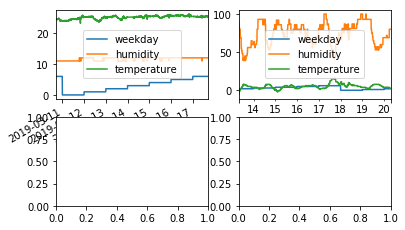

In [12]:
from automoticz.utils.analitics import *
import matplotlib.pyplot as plt

room_df = pd.read_csv('main_room_10-17_03.csv')
room_df = prepare_conditions_history(room_df)
out_df = pd.read_csv('out_temp_10-18_03.csv')
out_df = prepare_conditions_history(out_df)

fig, axes = plt.subplots(nrows=2, ncols=2)

room_df.plot(ax=axes[0,0], use_index=True)
out_df.plot(ax=axes[0,1], use_index=True)